In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('weather_classification_data.csv')

In [20]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [21]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [22]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [23]:
df_num.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5


In [24]:
df_cat.head()

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy


EDA

Categorical Features Analysis

In [25]:
cat_col=df.select_dtypes(exclude='number').columns
print(f"Categorical Columns: {cat_col}")

Categorical Columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


In [26]:
df.describe(exclude='number')

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


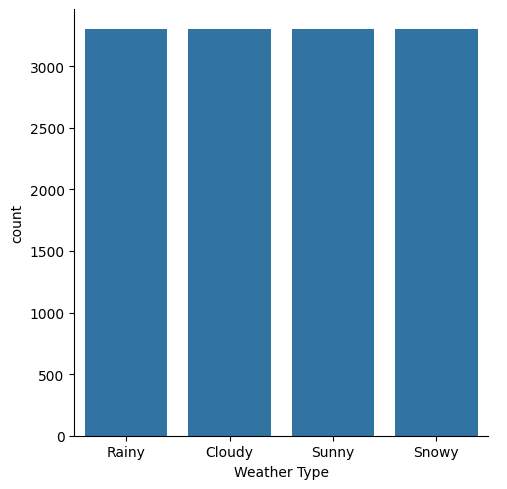

In [27]:
sns.catplot(x='Weather Type', kind='count', data=df)
plt.show()

Value Countplot

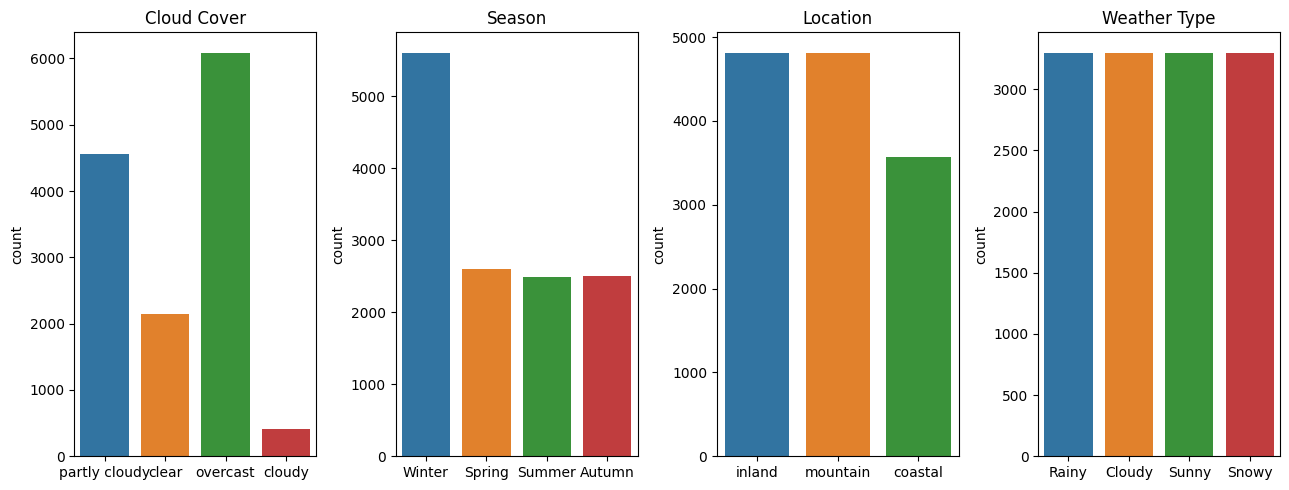

In [28]:
fig,ax=plt.subplots(nrows=len(cat_col)//4,ncols=4,figsize=(13,5))
ax = ax.flatten()
for i,col in enumerate(cat_col):
    k=sns.countplot(data=df,x=col,hue=col,ax=ax[i],legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel("")
plt.tight_layout()
plt.show()

Numerical Features Analysis

In [29]:
numerical_cols=df.select_dtypes(include='number').columns
print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [30]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


Univariate Distribution Analysis


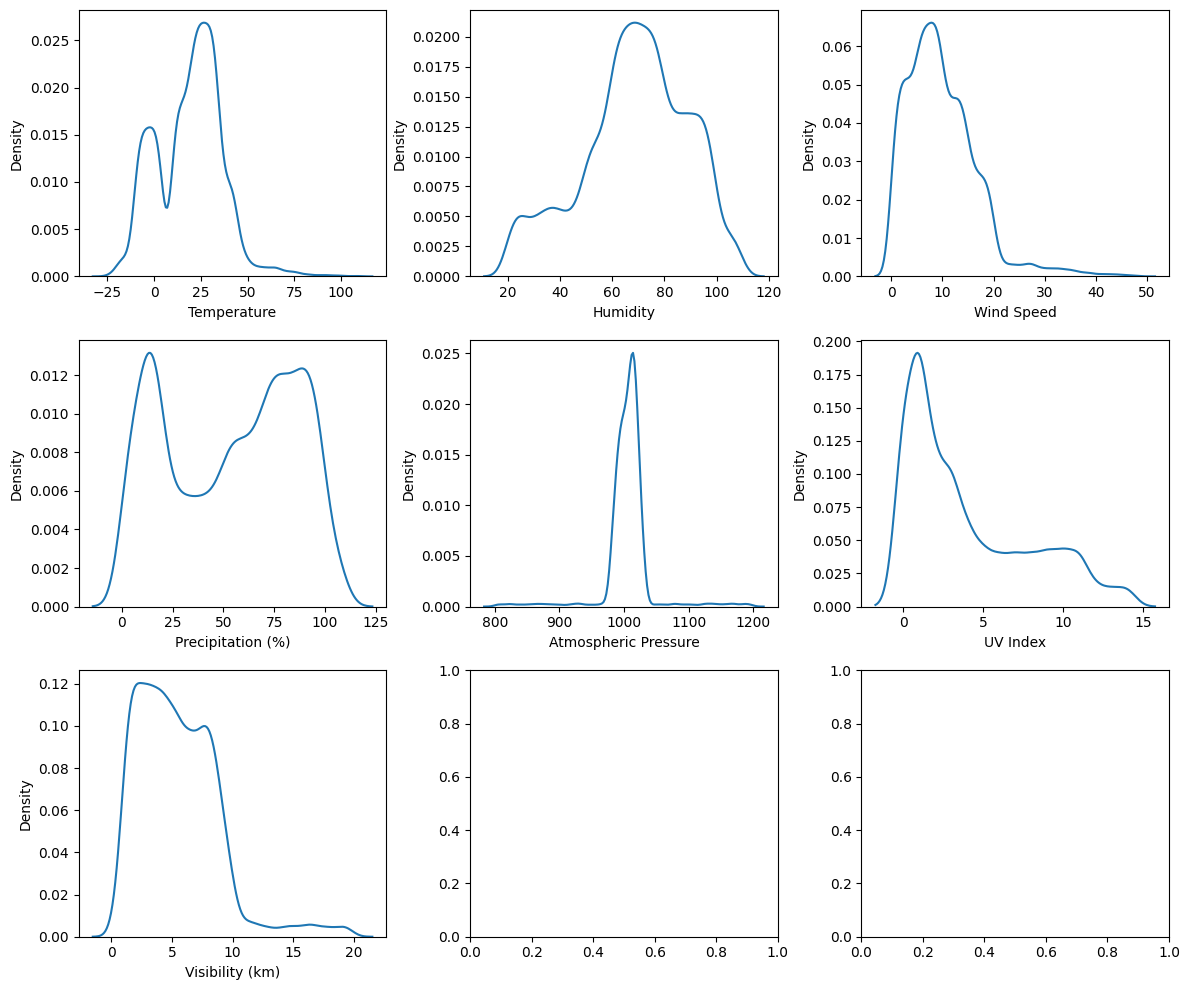

In [31]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
for i,col in enumerate(numerical_cols):
    k=sns.kdeplot(data=df,x=col,ax=ax[i])
    

plt.tight_layout()
plt.show()

Univariate Boxplots

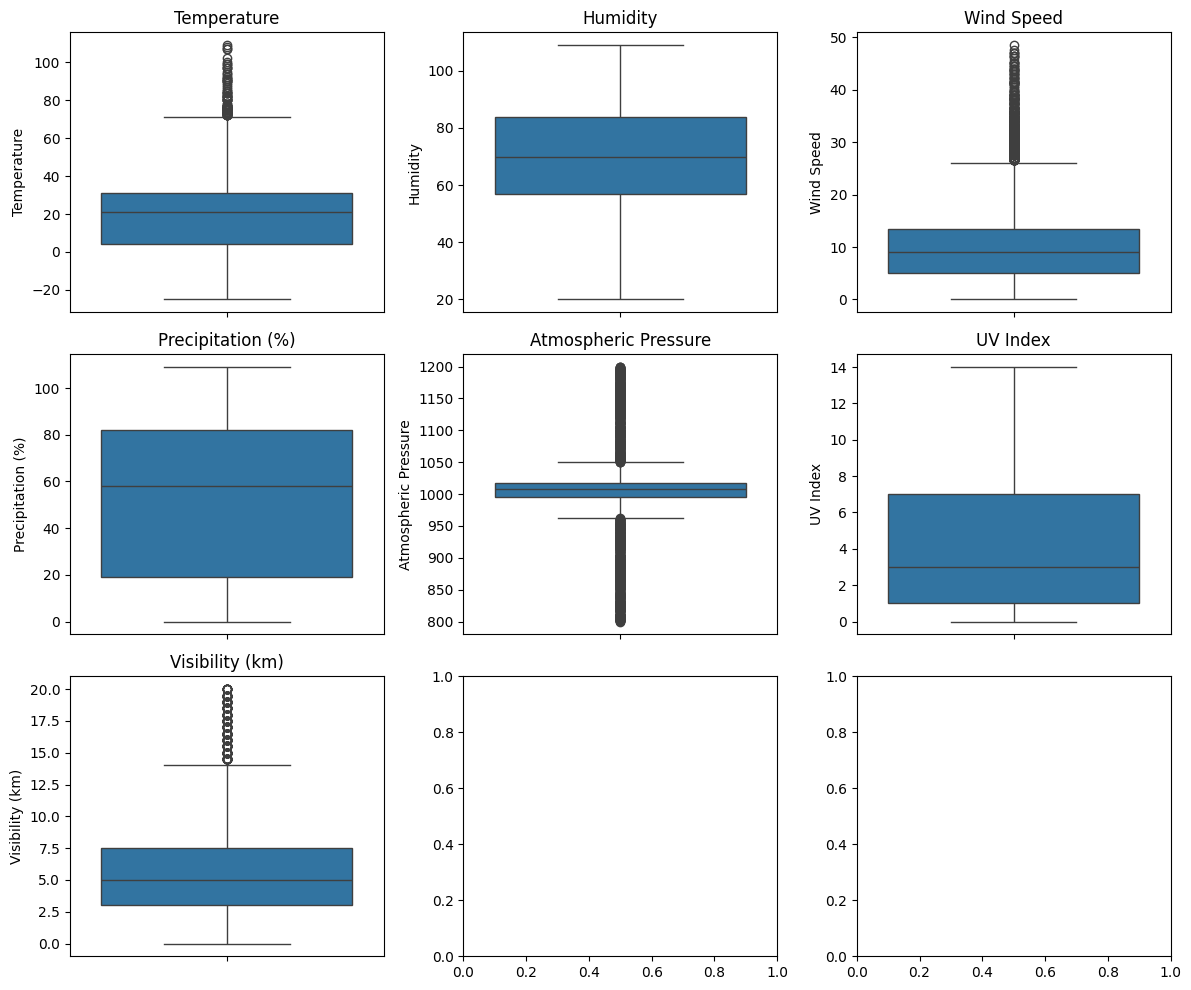

In [32]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()

for i,col in enumerate(numerical_cols):
    k=sns.boxplot(data=df,y=col,ax=ax[i])
    ax[i].set_title(col)
    
plt.tight_layout()
plt.show()

Target VS Feature Barplot

NameError: name 'target' is not defined

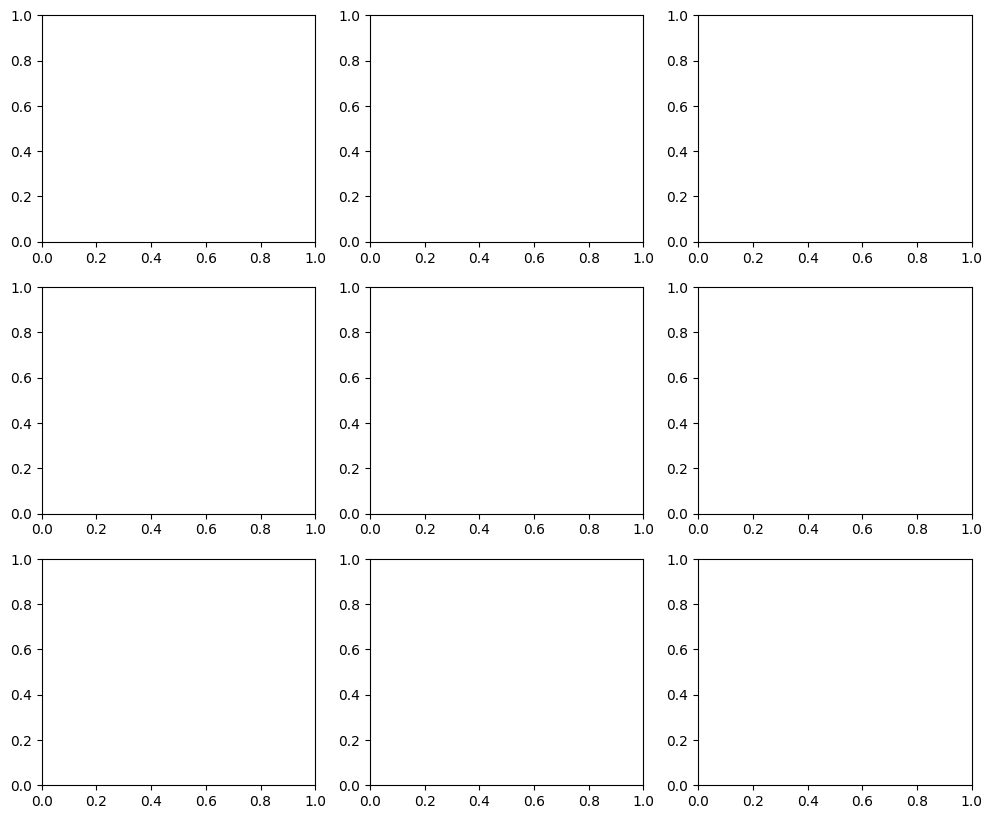

In [33]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
i=0
for col in numerical_cols:
    sns.barplot(data=df,x=target,y=col,hue=target,errorbar='sd',ax=ax[i],estimator=np.mean,legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    i+=1
    
plt.tight_layout()
plt.show()

Target VS Feature Boxplot

In [ ]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
i=0
for col in numerical_cols:
    sns.boxplot(data=df,x=target,y=col,hue=target,ax=ax[i],legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=20)
    ax[i].set_xlabel("")
    i+=1
        
plt.tight_layout()
plt.show()

Heatmap

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr())
plt.show()

Label Encoding Cat Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
df_cat.head()

In [ ]:
df1=pd.concat([df_num,df_cat],axis=1)

Splitting Dataset

In [ ]:
# Split dataset in independent and Target
X=df1.drop('Weather Type',axis=1)    # independent
Y=df1['Weather Type']          

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Training Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
bag = BaggingClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
svm=SVC()
nb=GaussianNB()

In [ ]:
lst=[lr,dtree,rf,bag,gb,xgb,ada,knn,svm,nb]

In [ ]:
for i in lst:
    print('classifer in',i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    #y_pred=i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print('classifier report',classification_report(y_test, y_pred))
    
    print('-' * 60)

In [ ]:
results = {
    'Classifier': [],
    'Accuracy': [],
    'Recall': []
}

for classifier in lst:
    print(f'Classifier: {classifier.__class__.__name__}')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
    results['Classifier'].append(classifier.__class__.__name__)
    results['Accuracy'].append(accuracy)
    results['Recall'].append(recall)

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'splitter': ['best', 'random'],    # The strategy used to choose the split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10], # The minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # The number of features to consider when looking for the best split
}

In [ ]:
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

In [ ]:
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.tight_layout()
plt.show()